In [157]:
# Importing the packages used in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Reading in the data
df = pd.read_csv('movies.csv')

In [158]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data cleaning

In [159]:
# Checking if there are any duplicated data

len(df)-len(df.drop_duplicates())


0

In [160]:
# Dropping all duplicates

df.drop_duplicates(inplace=True)

In [161]:
# Checking if there are any missing data

df.isna().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [162]:
# missing data in percent

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 1)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.3%
gross - 2.5%
company - 0.2%
runtime - 0.1%


In [163]:
# Dropping all nulls

df = df.dropna()

In [164]:
df.shape

(5421, 15)

In [165]:
# Data Types for  columns

df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [166]:
# Changing columns data type

df = df.astype({'budget': 'int64','gross': 'int64','votes': 'int64', })

In [167]:
# Creating correct Year column

df[['date', 'country1']] = df['released'].astype(str).str.split('(', expand=True)

df['year'] = df['date'].str[-5:].str.strip()

df.drop(['country1', 'date'], axis=1, inplace=True)

In [168]:
# Creating correct realeased date column

df[['realeased_date', 'country1']] = df['released'].astype(str).str.split('(', expand=True)
df.drop(['country1'], axis=1, inplace=True)

In [169]:
# Dropping unused column

df.drop(['released'], axis=1, inplace=True)


In [170]:
df.head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,realeased_date
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"
5,Friday the 13th,R,Horror,1980,6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,"May 9, 1980"
6,The Blues Brothers,R,Action,1980,7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,"June 20, 1980"
7,Raging Bull,R,Biography,1980,8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,"December 19, 1980"
8,Superman II,PG,Action,1981,6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,"June 19, 1981"
9,The Long Riders,R,Biography,1980,7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,"May 16, 1980"


In [171]:
df.dtypes

,0
name,object
rating,object
genre,object
year,object
score,float64
votes,int64
director,object
writer,object
star,object
country,object


In [172]:
# Changing data type

df['realeased_date'] = pd.to_datetime(df['realeased_date'], errors='coerce')

In [173]:
print(df['realeased_date'].isna().sum())

14


In [174]:
df = df.dropna(subset=['realeased_date'])

In [175]:
# Sorting data

df = df.sort_values(by=['gross'], ascending=False)

In [176]:
# Data after cleaning process

df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,realeased_date
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27


# Exploring the data

In [177]:
# Details about gross and budget tables

df[['gross', 'budget']].describe()

,gross,budget
count,5.407000e+03,5.407000e+03
mean,1.034955e+08,3.608856e+07
std,1.874721e+08,4.159678e+07
min,3.090000e+02,6.000000e+03
25%,1.085234e+07,1.000000e+07
50%,3.729544e+07,2.200000e+07
75%,1.130424e+08,4.500000e+07
max,2.847246e+09,3.560000e+08


In [178]:
# Looking at the top 15 companies by gross revenue

df.groupby('company')[['gross']].sum().sort_values('gross', ascending=False)[:15]

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39541625997
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [179]:
# Company gross revenue sum sorted

df.groupby(['company', 'year'])[['gross']].sum().sort_values('gross', ascending=False)[:15]

,,gross
company,year,
Walt Disney Pictures,2019,5773131804
Marvel Studios,2018,4018631866
Universal Pictures,2015,3834354888
Twentieth Century Fox,2009,3793491246
Walt Disney Pictures,2017,3789382071
Paramount Pictures,2011,3565705182
Warner Bros.,2011,3168551343
Walt Disney Pictures,2010,3104474158
Paramount Pictures,2014,3071298586


In [180]:
# Company gross revenue mean sorted

df.groupby(['company', 'year'])[['gross']].mean().sort_values(['gross','company', 'year'], ascending=False)[:15]

gross
company                       year              
Marvel Studios                2019  2.797501e+09
Lucasfilm                     2015  2.069522e+09
Marvel Studios                2012  1.518816e+09
Walt Disney Animation Studios 2019  1.450027e+09
Marvel Studios                2015  1.402810e+09
                              2018  1.339544e+09
Walt Disney Animation Studios 2013  1.281508e+09
Mandeville Films              2017  1.264435e+09
Illumination Entertainment    2015  1.159445e+09
Pixar Animation Studios       2019  1.073395e+09
Metro-Goldwyn-Mayer (MGM)     2012  1.062787e+09
Lucasfilm                     2016  1.056058e+09
Illumination Entertainment    2017  1.034800e+09
Pixar Animation Studios       2016  1.028571e+09
Lucasfilm                     1999  1.027083e+09

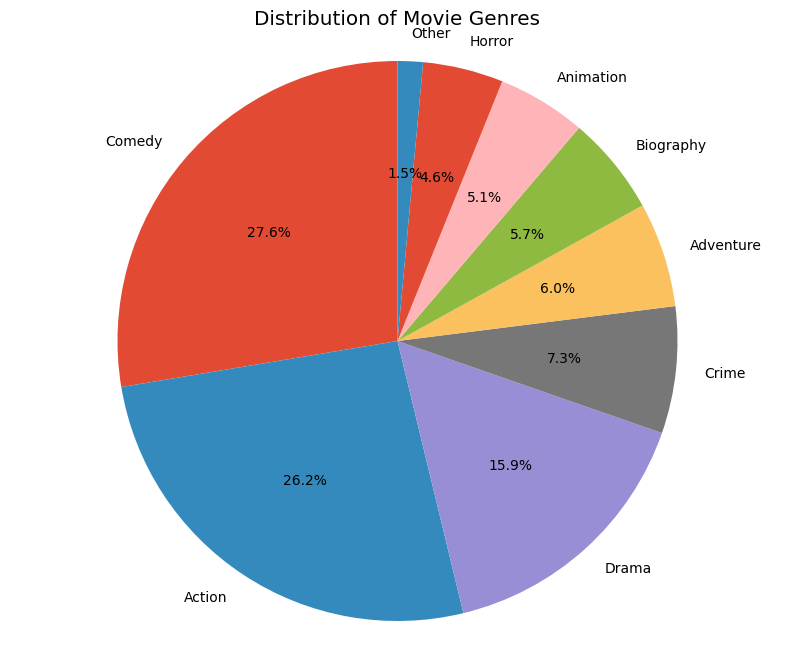

In [181]:
# pie chart for distribution of genres
threshold = 50
genre_counts = df['genre'].value_counts()
small_genres = genre_counts[genre_counts < threshold].index
df['genre'] = df['genre'].replace(small_genres, 'Other')


genre_counts = df['genre'].value_counts()


plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movie Genres')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Average Votes by Genre')

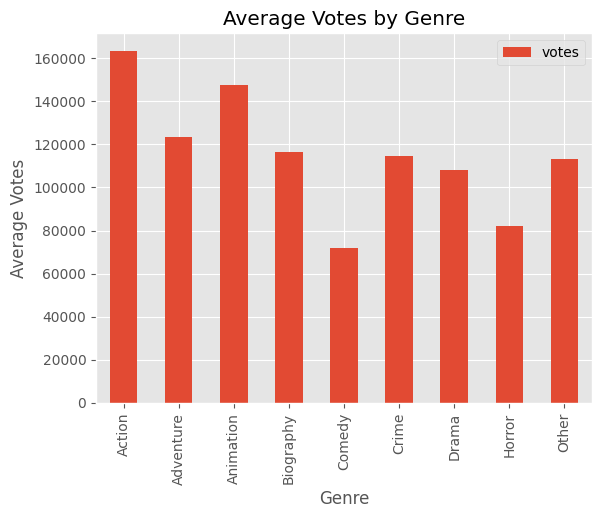

In [182]:
df.groupby('genre')[['votes']].mean().plot(kind='bar', label = "Average Votes")
plt.legend()
plt.xlabel("Genre")
plt.ylabel("Average Votes")
plt.title("Average Votes by Genre")

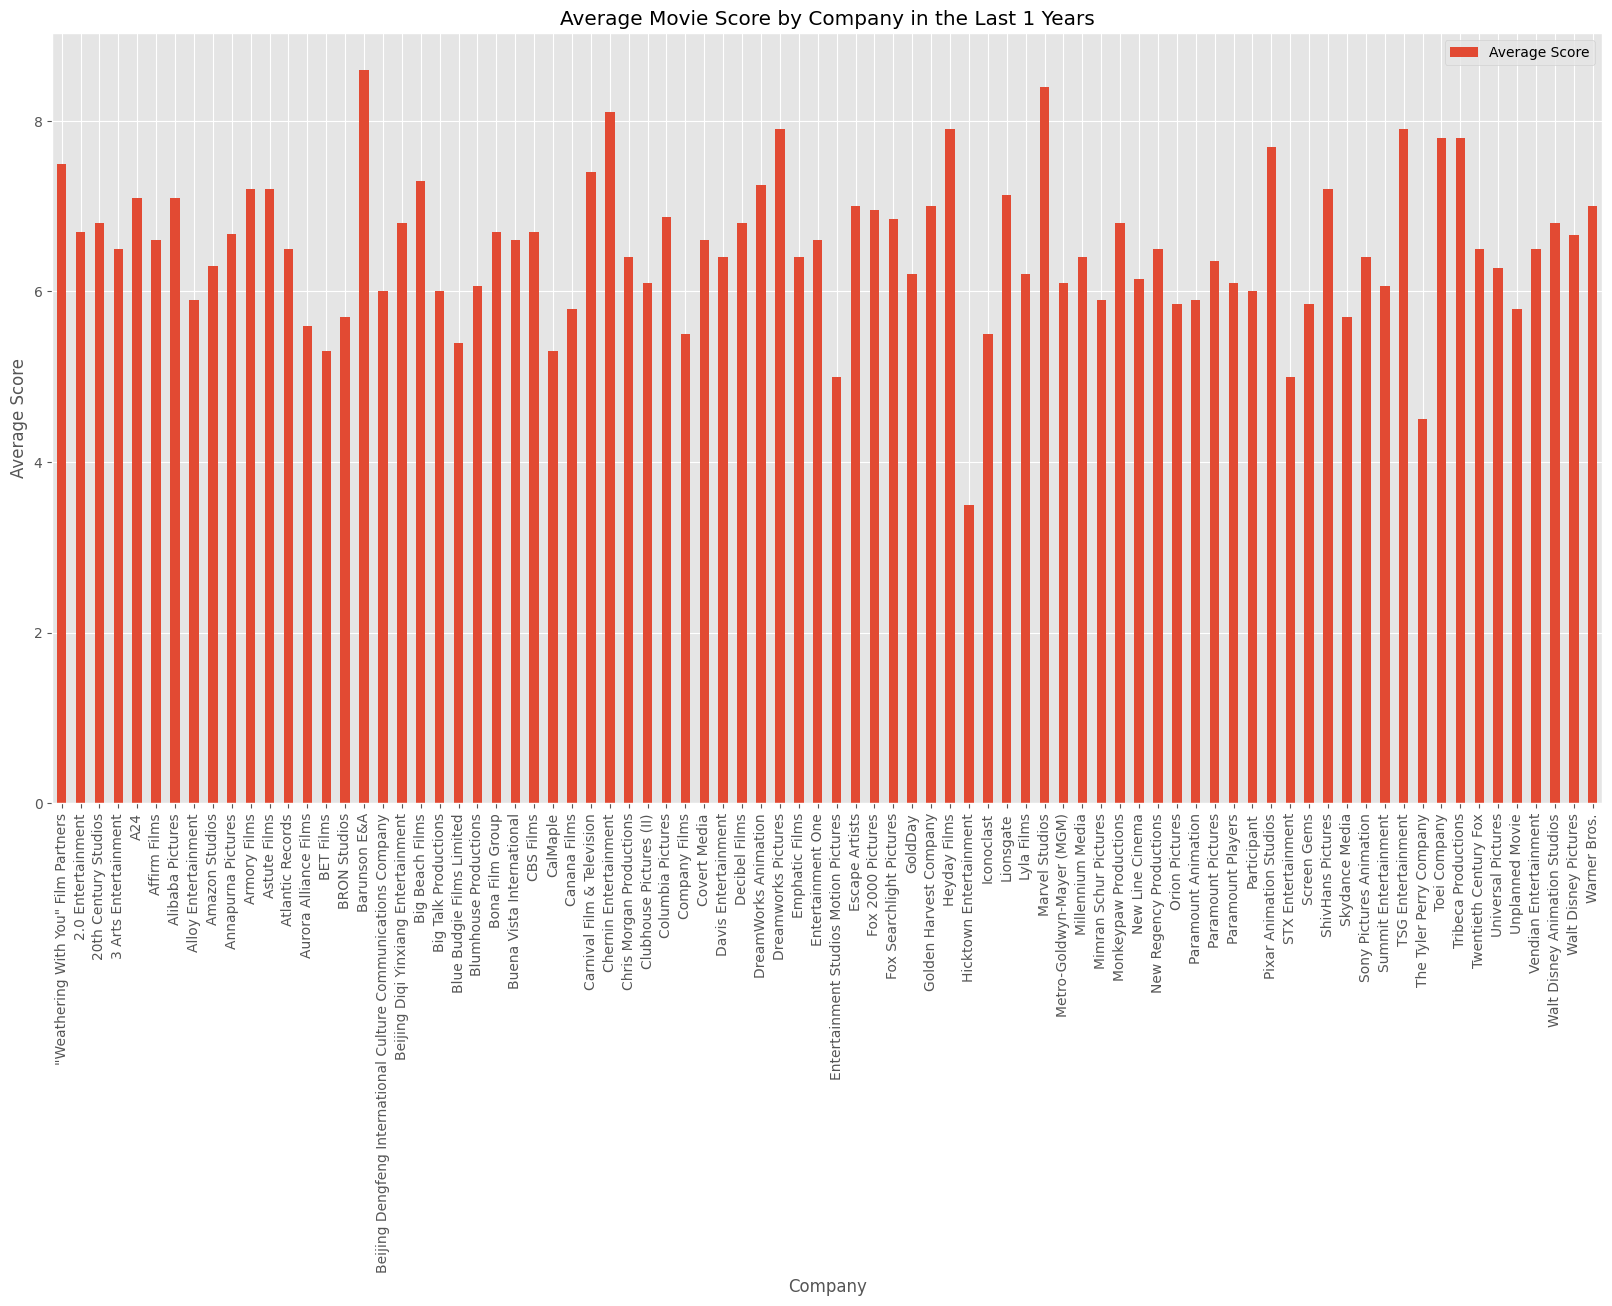

In [183]:
df['year'] = df['year'].astype(int)
last_1_year = df[df['year'] >= 2019]

last_1_year.groupby(['company'])['score'].mean().plot(kind = "bar", figsize=(20,10), label = "Average Score")
plt.legend()
plt.xlabel("Company")
plt.ylabel("Average Score")
plt.title("Average Movie Score by Company in the Last 1 Years")
plt.show()

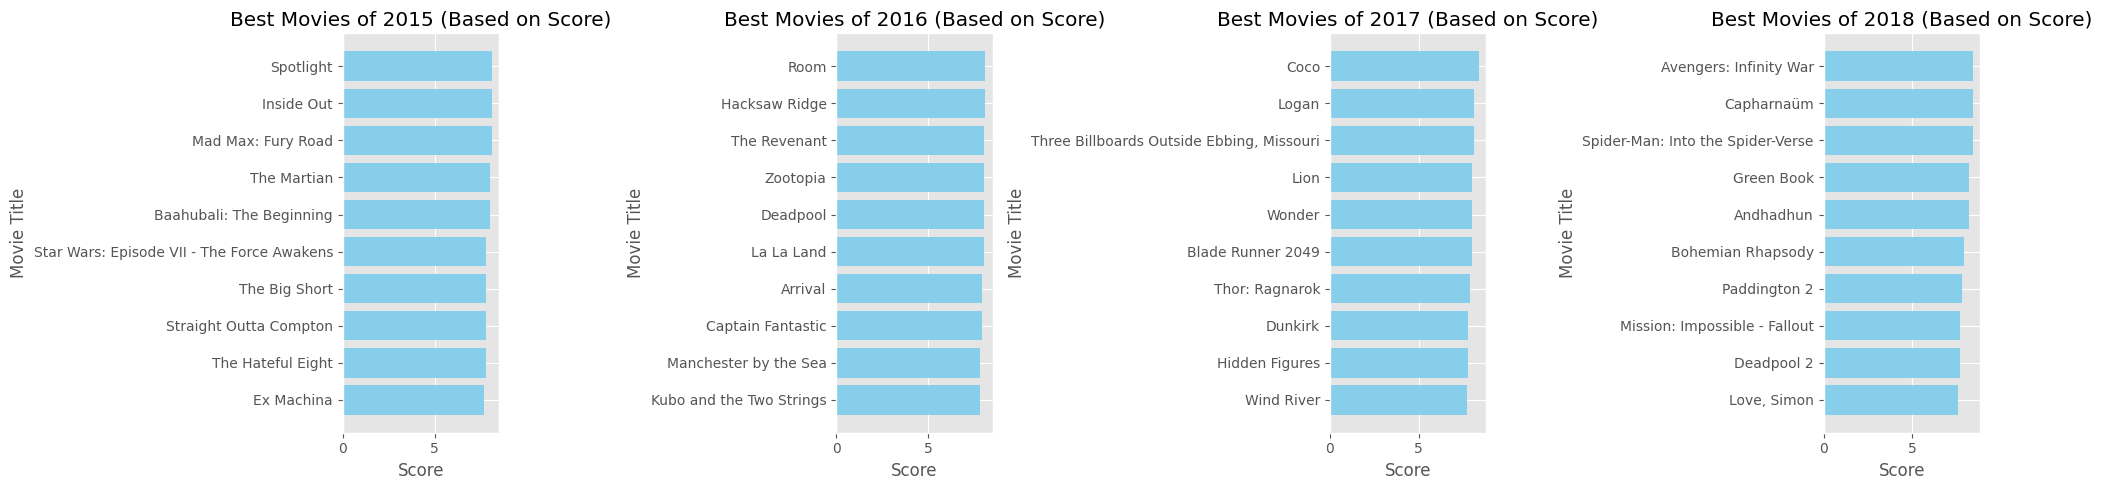

In [184]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

years = [2015, 2016, 2017, 2018]

for i, year in enumerate(years):
    movies_year = df[df['year'] == year]
    best_movies_year = movies_year.sort_values(by=['score'], ascending=False).head(10)

    ax = axes[i]

    ax.barh(best_movies_year['name'], best_movies_year['score'], color='skyblue')
    ax.invert_yaxis()
    ax.set_xlabel('Score')
    ax.set_ylabel('Movie Title')
    ax.set_title(f'Best Movies of {year} (Based on Score)')

plt.tight_layout()
plt.show()

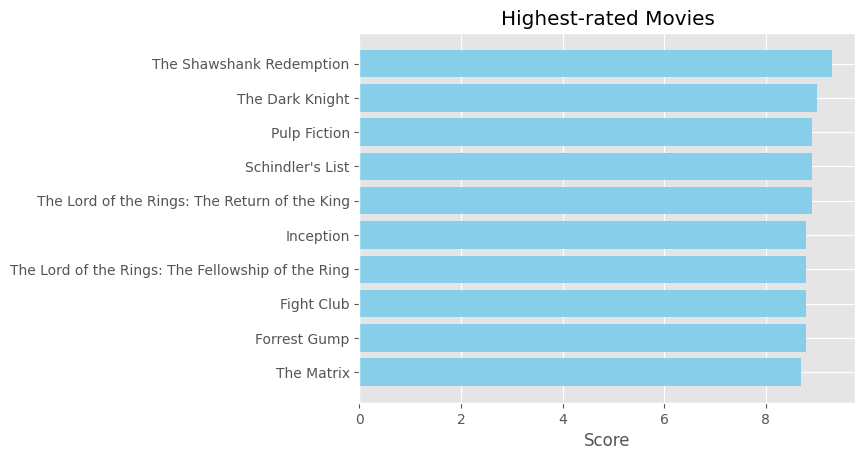

In [185]:
film_ranking = df.sort_values('score', ascending=False)

plt.barh(film_ranking['name'].head(10),film_ranking['score'].head(10), align='center', color='skyblue')

plt.gca().invert_yaxis()
plt.xlabel("Score")
plt.title("Highest-rated Movies")
plt.show()

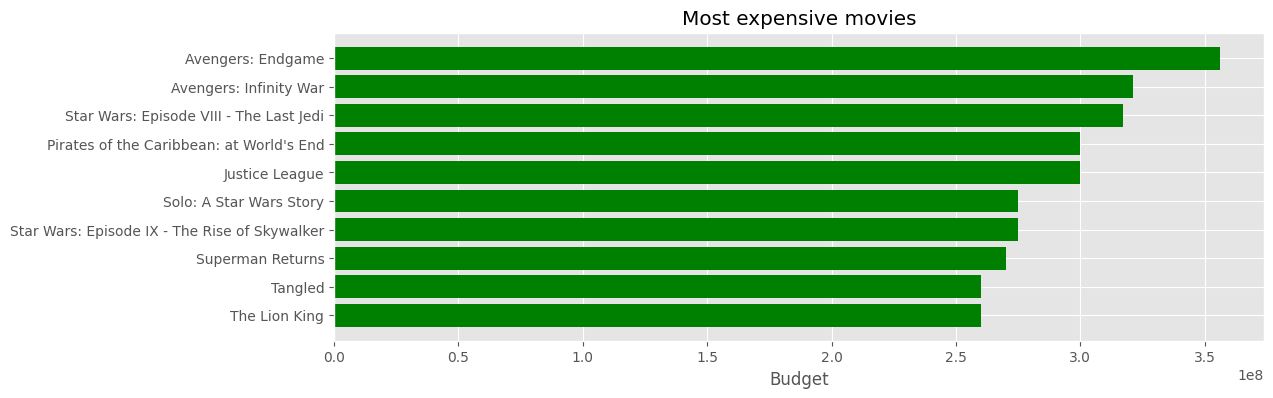

In [186]:
budget_ranking = df.sort_values('budget', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(budget_ranking['name'].head(10),budget_ranking['budget'].head(10), align='center',
        color='green')
plt.gca().invert_yaxis()
plt.xlabel("Budget")
plt.title("Most expensive movies")
plt.show()

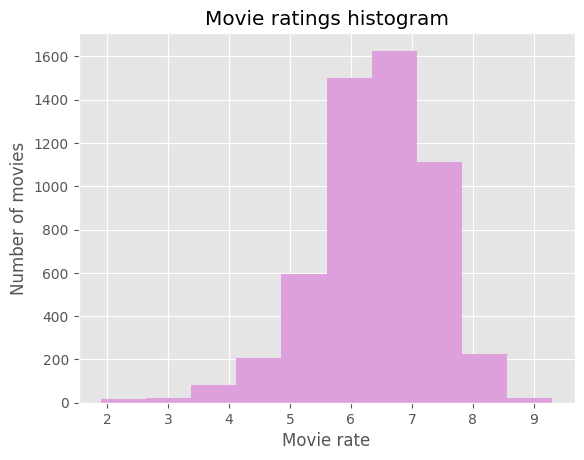

In [187]:
plt.hist(x=df['score'], bins=10, color='plum')
plt.xlabel('Movie rate')
plt.ylabel('Number of movies')
plt.title("Movie ratings histogram")
plt.show()

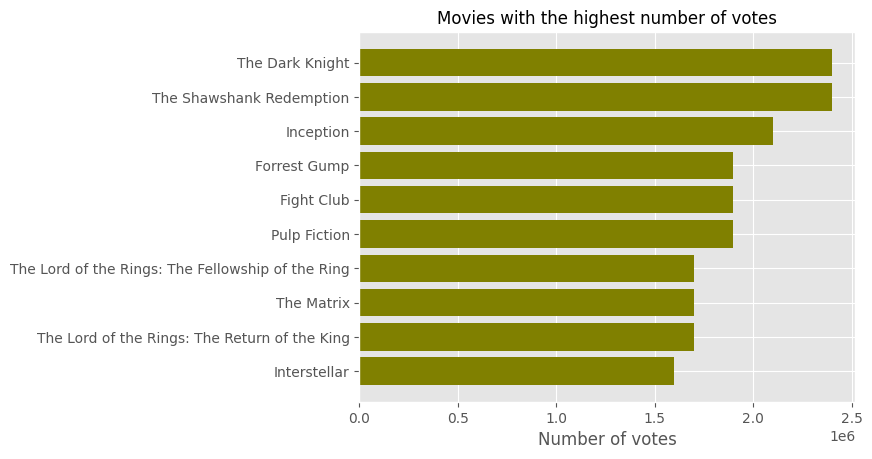

In [188]:
film_ranking = df.sort_values('votes', ascending=False)

plt.barh(film_ranking['name'].head(10),film_ranking['votes'].head(10), align='center', color='olive')

plt.gca().invert_yaxis()
plt.xlabel("Number of votes")
plt.title("Movies with the highest number of votes", fontsize=12)
plt.show()

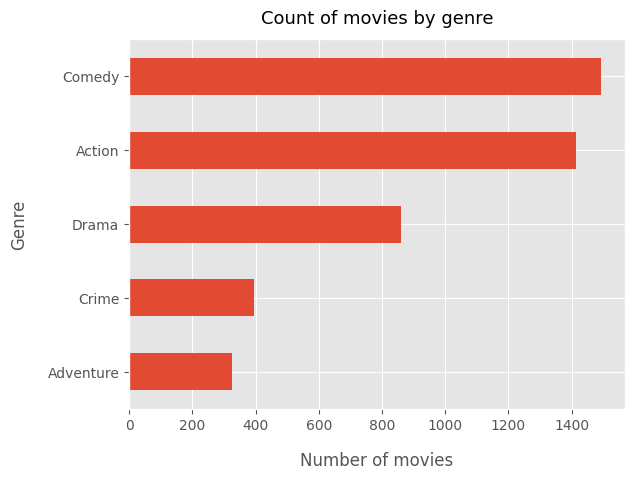

In [189]:
df['genre'].value_counts().head(5).sort_values().plot(kind='barh')

plt.xlabel('Number of movies', labelpad=14, fontsize=12)
plt.ylabel('Genre', labelpad=14, fontsize=12)
plt.title('Count of movies by genre', y=1.02, fontsize=13)
plt.show()

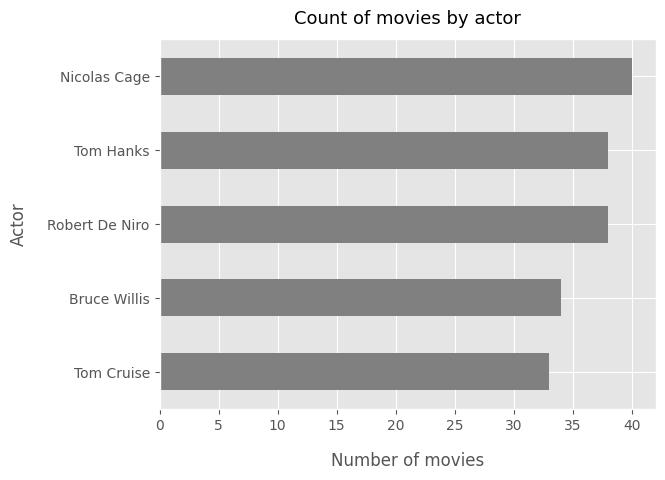

In [190]:
df['star'].value_counts().head(5).sort_values().plot(kind='barh', color='grey')

plt.xlabel('Number of movies', labelpad=14, fontsize=12)
plt.ylabel('Actor', labelpad=14, fontsize=12)
plt.title('Count of movies by actor', y=1.02, fontsize=13)
plt.show()

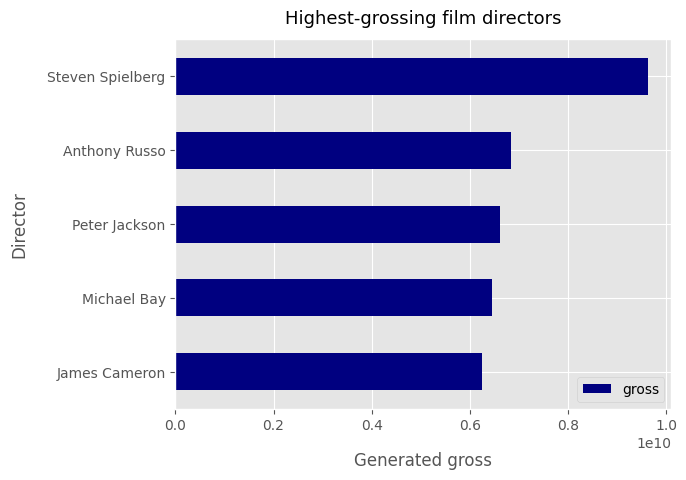

In [191]:
df.groupby(['director'])[['gross']].sum().sort_values(['gross'], ascending=False).head(5).plot(kind='barh', color='navy')

plt.gca().invert_yaxis()
plt.xlabel('Generated gross', labelpad=14, fontsize=12)
plt.ylabel('Director', labelpad=14, fontsize=12)
plt.title('Highest-grossing film directors', y=1.02, fontsize=13)

plt.show()

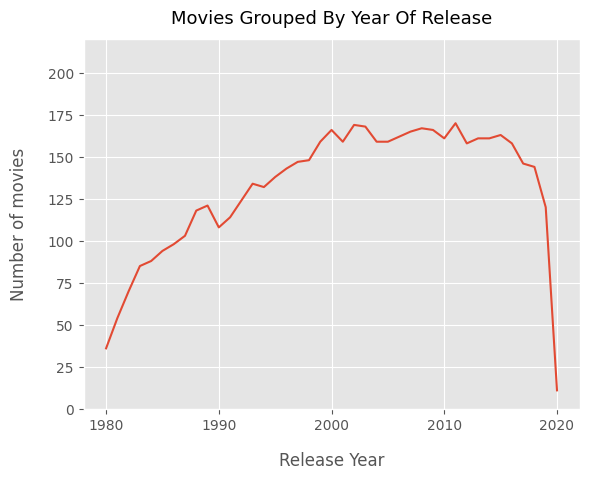

In [192]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

data = df['year'].value_counts().sort_index()

plt.plot(data.index, data.values)

plt.title('Movies Grouped By Year Of Release',y=1.02, fontsize=13)
plt.xlabel('Release Year', labelpad=14, fontsize=12)
plt.ylabel('Number of movies', labelpad=14, fontsize=12)

plt.ylim(0, max(data.values)+50)
plt.xticks([1980, 1990, 2000, 2010, 2020])
plt.show()


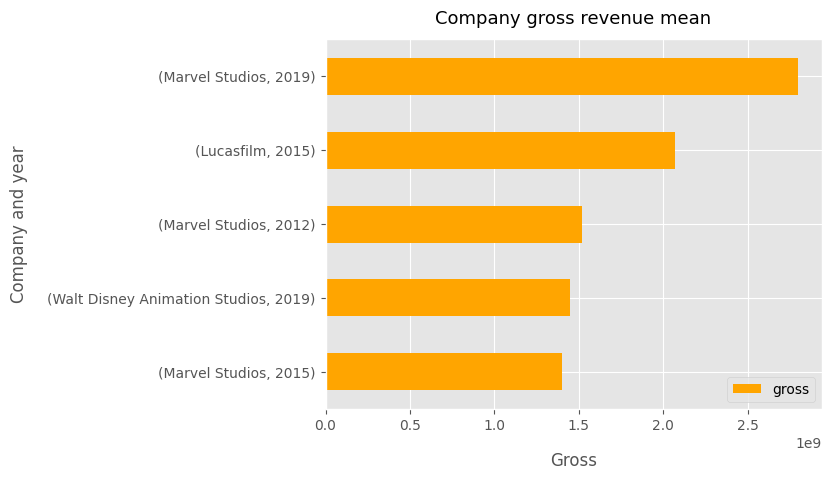

In [193]:
df.groupby(['company', 'year'])[['gross']].mean().sort_values(['gross','company', 'year'], ascending=False).head(5).plot(kind='barh', color='orange')

plt.gca().invert_yaxis()
plt.xlabel('Gross', labelpad=14, fontsize=12)
plt.ylabel('Company and year', labelpad=14, fontsize=12)
plt.title('Company gross revenue mean', y=1.02, fontsize=13)
plt.show()

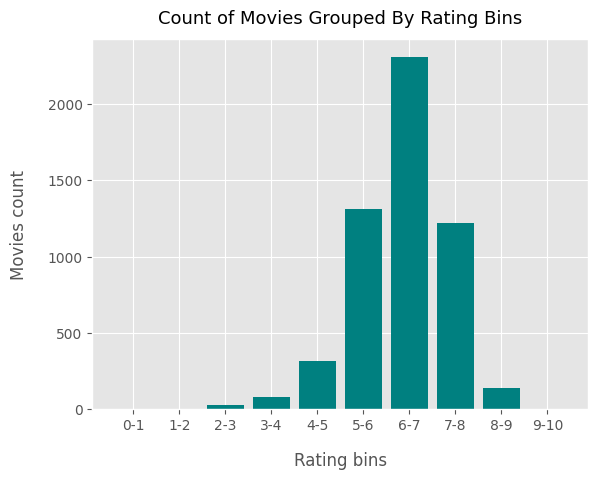

In [194]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
df['score_bin'] = pd.cut(x = df['score'], bins = bins, labels = labels, include_lowest = True)

x = df['score_bin'].value_counts().sort_index()

plt.bar(x.index, x.values, color='teal')
plt.title('Count of Movies Grouped By Rating Bins',y=1.02, fontsize=13)
plt.xlabel('Rating bins', labelpad=14, fontsize=12)
plt.ylabel('Movies count', labelpad=14, fontsize=12)
plt.show()

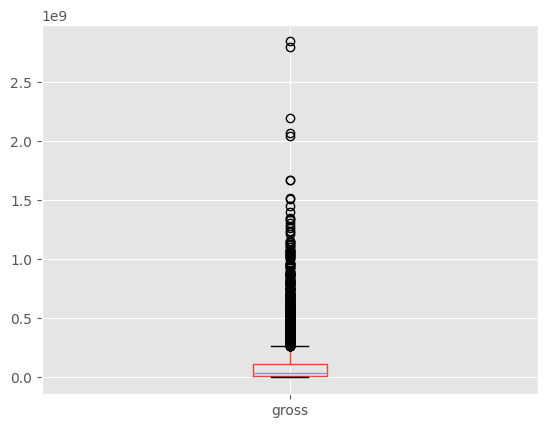

In [195]:
# Lokking for outliers

df.boxplot(column=['gross'])
plt.show()

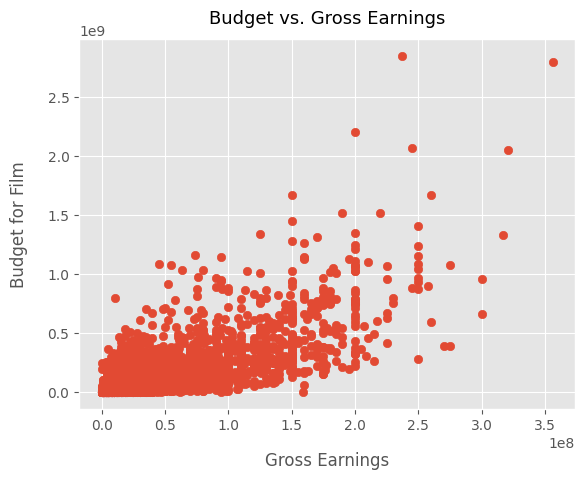

In [196]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs. Gross Earnings', y=1.02, fontsize=13)

plt.xlabel('Gross Earnings', labelpad=14, fontsize=12)
plt.ylabel('Budget for Film', labelpad=14, fontsize=12)
plt.show()

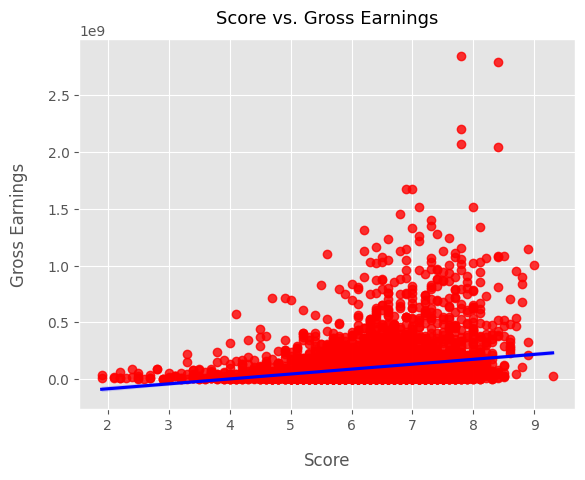

In [197]:
# Plot score vs gross using seaborn

sns.regplot(data=df, x='score', y='gross', scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

plt.title('Score vs. Gross Earnings', y=1.02, fontsize=13)

plt.xlabel('Score', labelpad=14, fontsize=12)
plt.ylabel('Gross Earnings', labelpad=14, fontsize=12)
plt.show()

In [198]:
# Correlation Matrix between all numeric columns

numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.061443  0.202215  0.319669  0.268141  0.075183
score    0.061443  1.000000  0.474594  0.071552  0.222504  0.414501
votes    0.202215  0.474594  1.000000  0.439077  0.614432  0.352263
budget   0.319669  0.071552  0.439077  1.000000  0.740028  0.318353
gross    0.268141  0.222504  0.614432  0.740028  1.000000  0.275641
runtime  0.075183  0.414501  0.352263  0.318353  0.275641  1.000000


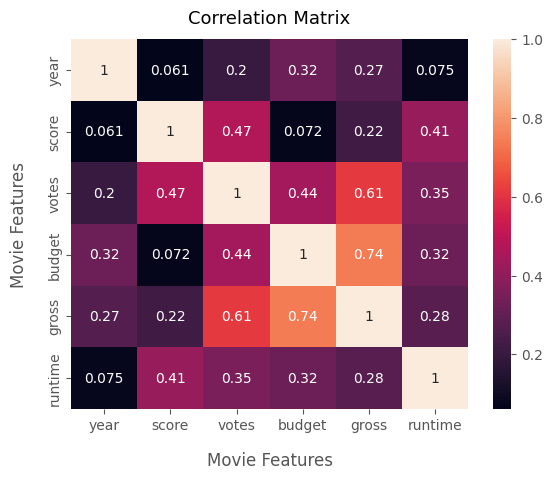

In [199]:

numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix', y=1.02, fontsize=13)
plt.xlabel('Movie Features', labelpad=14, fontsize=12)
plt.ylabel('Movie Features', labelpad=14, fontsize=12)
plt.show()


In [200]:
#  correlation between numeric features

numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

year     year       1.000000
         score      0.061443
         votes      0.202215
         budget     0.319669
         gross      0.268141
         runtime    0.075183
score    year       0.061443
         score      1.000000
         votes      0.474594
         budget     0.071552
         gross      0.222504
         runtime    0.414501
votes    year       0.202215
         score      0.474594
         votes      1.000000
         budget     0.439077
         gross      0.614432
         runtime    0.352263
budget   year       0.319669
         score      0.071552
         votes      0.439077
         budget     1.000000
         gross      0.740028
         runtime    0.318353
gross    year       0.268141
         score      0.222504
         votes      0.614432
         budget     0.740028
         gross      1.000000
         runtime    0.275641
runtime  year       0.075183
         score      0.414501
         votes      0.352263
         budget     0.318353
         gross      0.275641
         runtime    1.000000
dtype: float64

In [201]:


sorted_pairs = corr_pairs.sort_values()

sorted_pairs

,,0
year,score,0.061443
score,year,0.061443
budget,score,0.071552
score,budget,0.071552
year,runtime,0.075183
runtime,year,0.075183
year,votes,0.202215
votes,year,0.202215
gross,score,0.222504
score,gross,0.222504


In [202]:
# Highest correlation

high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr



,,0
gross,votes,0.614432
votes,gross,0.614432
budget,gross,0.740028
gross,budget,0.740028
year,year,1.000000
budget,budget,1.000000
votes,votes,1.000000
score,score,1.000000
gross,gross,1.000000
runtime,runtime,1.000000


# Votes and budget have the highest correlation to gross earnings


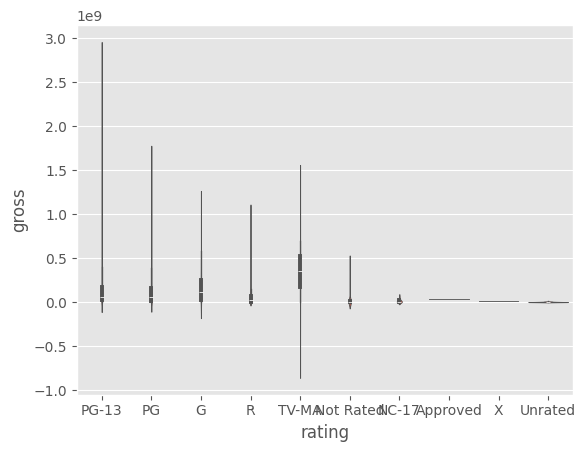

In [203]:
sns.violinplot(x="rating", y="gross", data=df)

plt.show()

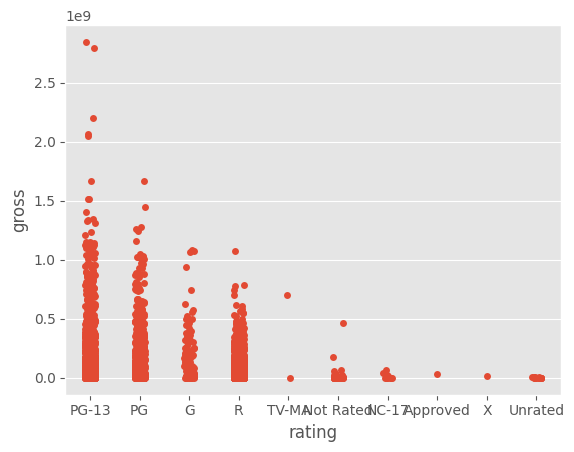

In [204]:
sns.stripplot(x="rating", y="gross", data=df)

plt.show()

In [205]:
# Changing non numeric columns data type to categorical and numerizing them

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Convert 'score_bin' to numeric, handling errors
df_numerized['score_bin'] = pd.to_numeric(df_numerized['score_bin'], errors='coerce')
# errors='coerce' will replace non-numeric values with NaN

df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,realeased_date,score_bin
name,1.000000,-0.029220,0.006488,0.025485,0.013644,0.012264,0.014687,0.012449,-0.006846,-0.025192,0.022954,0.005278,0.021215,0.011083,0.026153,NaN
rating,-0.029220,1.000000,0.141375,0.022089,0.066535,0.006652,0.014283,-0.002375,0.010629,0.009889,-0.203553,-0.181739,-0.092134,0.142450,0.020905,NaN
genre,0.006488,0.141375,1.000000,-0.067855,0.062091,-0.141169,-0.007819,0.017373,0.003464,-0.008461,-0.379461,-0.254675,-0.075617,-0.038842,-0.067459,NaN
year,0.025485,0.022089,-0.067855,1.000000,0.061443,0.202215,-0.036274,-0.024065,-0.032943,-0.074050,0.319669,0.268141,-0.019378,0.075183,0.999623,NaN
score,0.013644,0.066535,0.062091,0.061443,1.000000,0.474594,0.006557,0.014493,0.007886,-0.042119,0.071552,0.222504,0.020800,0.414501,0.062860,NaN
votes,0.012264,0.006652,-0.141169,0.202215,0.474594,1.000000,-0.010430,-0.005376,-0.018099,0.041409,0.439077,0.614432,0.117717,0.352263,0.203881,NaN
director,0.014687,0.014283,-0.007819,-0.036274,0.006557,-0.010430,1.000000,0.259625,0.035932,0.011458,-0.009708,-0.029676,-0.009179,0.018158,-0.036575,NaN
writer,0.012449,-0.002375,0.017373,-0.024065,0.014493,-0.005376,0.259625,1.000000,0.017183,0.022269,-0.039757,-0.036044,-0.004835,-0.017491,-0.024265,NaN
star,-0.006846,0.010629,0.003464,-0.032943,0.007886,-0.018099,0.035932,0.017183,1.000000,-0.011115,-0.022185,-0.000420,0.013621,0.009753,-0.032547,NaN
country,-0.025192,0.009889,-0.008461,-0.074050,-0.042119,0.041409,0.011458,0.022269,-0.011115,1.000000,0.052579,0.059910,0.047912,-0.035499,-0.073632,NaN


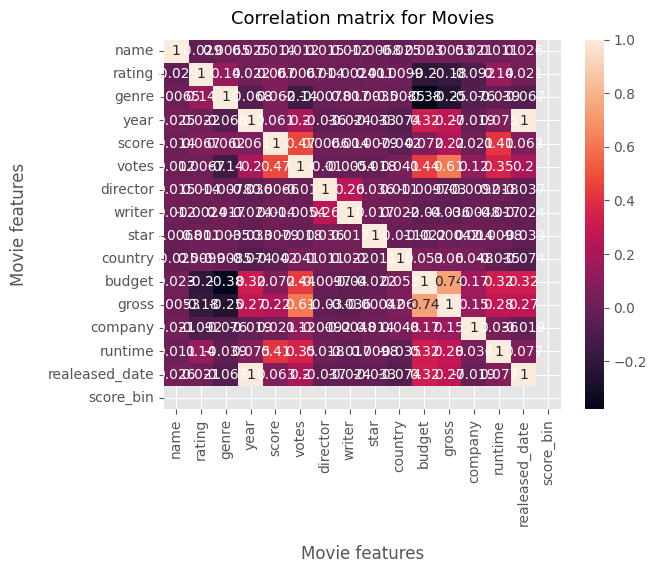

In [206]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies", y=1.02, fontsize=13)

plt.xlabel("Movie features", labelpad=14, fontsize=12)
plt.ylabel("Movie features", labelpad=14, fontsize=12)

plt.show()